<div dir="rtl" align="center">

به نام خداوند بخشنده مهربان

<h1>
پروژه پایانی جبر خطی
</h1>

حمیدرضا ربیعی، مریم رمضانی

</div>

<div dir="rtl">

 نام و نام‌خانوادگی:‌ 
علی نظری
    <br>
شماره دانشجویی: 
99102401
</div>

<div dir="rtl">
    <h1>
        خوشه‌بندی کاربران در شبکه‌های اجتماعی
    </h1>
</div>

<div dir="rtl">
    هدف از این پروژه، جدا کردن و گروه‌بندی رئوس یک گراف همبند به صورت خوشه‌هایی است که بیشترین ارتباط را با هم دارند.
    برای مثال، ارتباط دوستی در یک شبکه‌ی اجتماعی را به صورت یال‌های بدون جهت بین کاربران در نظر بگیرید.
    می‌خواهیم کاربرانی که با هم بیشترین ارتباط را داشته و اجتماع‌های کوچک را تشکیل می‌دهند، پیدا کنیم.
    مثلا در گراف زیر، قرار است راس‌های ۱ تا ۴ در یک دسته و راس‌های ۵ تا ۹ در دسته‌ی دیگر قرار گیرند.
    </br>
    در این پروژه، ابتدا با دنبال کردن مراحل، قدم به قدم گراف زیر را خوشه‌بندی می‌کنید، سپس خودتان مراحل را روی گراف شامل ۳۵۱ فرد اجرا می‌کنید تا خوشه‌هایشان مشخص شود. 
</div>

<center>

![Graph](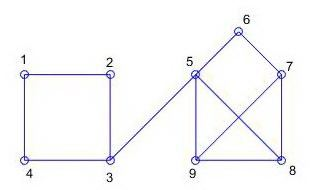
)

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
adj = np.array(
    [
        [0, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 1, 0]
    ]
)

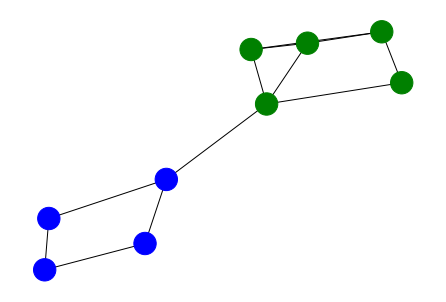

In [3]:
def show_graph(adjacency_matrix, labels=None, node_size=500):
    color_map = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=node_size, node_color=np.array(colors)[list(gr.nodes)] if labels is not None else None)
    plt.show()


show_graph(adj, [1, 1, 1, 1, 2, 2, 2, 2, 2])


<div dir="rtl">
    می‌توانید از تابع show_graph برای نمایش گراف خود استفاده کنید.
    ورودی اول این تابع ماتریس مجاورت بوده و ورودی دوم آن در صورت داده شدن، باید به صورت یک لیست از اعداد ۱ تا ۴ باشد.
    بعد از خوشه‌بندی می‌توانید شماره‌ی خوشه‌ی متناظر با هر راس را در این لیست قرار دهید تا رنگ آن‌ها مشخص باشند.
</div>

<div dir="rtl">
    <h2>
        گراف تمرینی
    </h2>
</div>

<div dir="rtl">
    ابتدا ماتریس مجاورت گراف را به شکل یک ماتریس در numpy تعریف کنید.
    در این ماتریس، اگر بین دو راس i و j یال وجود داشته باشد،
    درایه‌ی i,j یک خواهد بود.
    بنابراین به دلیل بدون جهت بودن گراف، ماتریس متقارن خواهد بود.
</div>

In [4]:
# Your code
adj = np.array(
    [
        [0, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 1, 0]
    ]
)

<div dir="rtl">
    در این مرحله، ابتدا جمع سطرها را محاسبه کرده و در بردار Sum ذخیره کنید.
    سپس ماتریس لاپلاسین را به صورت
    $
    Lapl = diag(Sum) - Adj
    $
    محاسبه کنید.
    منظور از
    $diag(x)$
    ماتریس قطری‌ای است که درایه‌های
    $x$
    روی قطر اصلی آن قرار گرفته و بقیه‌ی درایه‌های آن صفر هستند.
    هدف از محاسبه‌ی این ماتریس این است که با حفظ ویژگی‌های ماتریس مجاورت، جمع سطرها و ستون‌های آن نیز صفر شوند.
</div>

In [5]:
# Your code
Sum = np.sum(adj, axis=0)
Sum_list = list(Sum)
diag_list = []
counter = 0
for i in range(len(Sum_list)):
    diag_list.append([])
    for j in range(len(Sum_list)):
        if j == counter:
            diag_list[counter].append(Sum_list[counter])
        else:
            diag_list[counter].append(0)
    counter += 1
diag = np.array(diag_list)
Lapl = diag - adj
Lapl

array([[ 2, -1,  0, -1,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  3, -1, -1,  0,  0,  0,  0],
       [-1,  0, -1,  2,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  4, -1,  0, -1, -1],
       [ 0,  0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  3, -1, -1],
       [ 0,  0,  0,  0, -1,  0, -1,  3, -1],
       [ 0,  0,  0,  0, -1,  0, -1, -1,  3]])

<div dir="rtl">
    حال باید مقدار ویژه و بردار ویژه‌های ماتریس را استخراج کنید.
    همچنین باید این مقادیر ویژه و بردار ویژه‌های متناظرشان، از کوچک به بزرگ مرتب شده باشند.
</div>

In [6]:
# Your code
eigenValues, eigenVectors = np.linalg.eig(Lapl)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors[abs(eigenVectors) < 1e-10] = 0
print(eigenValues)
print("------")
print(eigenVectors)

[5.67037844e+00 4.33127361e+00 4.00000000e+00 3.43361574e+00
 2.28442262e+00 2.00000000e+00 2.00000000e+00 2.80309588e-01
 5.55111512e-17]
------
[[-0.06138362  0.32681729  0.         -0.36596445  0.66095603  0.
   0.         -0.45554203 -0.33333333]
 [ 0.11265056 -0.38095026  0.          0.2623262  -0.09399542 -0.69631062
  -0.57735027 -0.39169563 -0.33333333]
 [-0.35208656  0.56128199  0.         -0.01011052 -0.63422161  0.
   0.         -0.21805319 -0.33333333]
 [ 0.11265056 -0.38095026  0.          0.2623262  -0.09399542  0.69631062
   0.57735027 -0.39169563 -0.33333333]
 [ 0.71490324  0.01468061  0.         -0.52026832 -0.2658438   0.
   0.          0.19035409 -0.33333333]
 [-0.2806908  -0.1887151   0.         -0.09485376  0.059382   -0.14213381
  -0.47140452  0.30870383 -0.33333333]
 [ 0.31533823  0.42526592  0.          0.65625216  0.24895421  0.
   0.          0.34052092 -0.33333333]
 [-0.2806908  -0.1887151  -0.70710678 -0.09485376  0.059382    0.07106691
   0.23570226  0.3087

<div dir="rtl">
    چون جمع سطرهای ماتریس لاپلاسین صفر بود، ماتریس تکین بوده و یک مقدار ویژه‌ی صفر خواهد داشت.
    همچنین ماتریس مثبت نیمه معین است و همه‌ی مقادیر ویژه نامنفی هستند.
    بنابراین کوچک‌ترین مقدار ویژه صفر بوده و مقدار ويژه‌ی بعدی مثبت خواهد بود.
    بردار ویژه‌ی متناظر با این مقدار ویژه را در نظر بگیرید.
    این بردار ویژه متناظر با کمترین واریانس است.
    (برای اطلاعات بیشتر در مورد PCA مطالعه کنید.)
    بنابراین مناسب‌ترین معیار برای خوشه‌بندی است.
    </br>
    راس‌هایی که درایه‌ی متناظرشان در این بردار ویژه مثبت است را در یک خوشه و راس‌هایی که منفی است را در خوشه‌ی دیگر در نظر بگیرید.
    با بررسی خروجی می‌توانید تبدیل شدن گراف اولیه به دو خوشه‌ی گفته شده در ابتدای پروژه را مشاهده کنید.
</div>

In [7]:
# Your code
eigenVectors = eigenVectors.T
main_list = []
for i in eigenVectors[len(eigenVectors) - 2]:
    if i < 0:
        main_list.append(1)
    else:
        main_list.append(2)
print(main_list)

[1, 1, 1, 1, 2, 2, 2, 2, 2]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

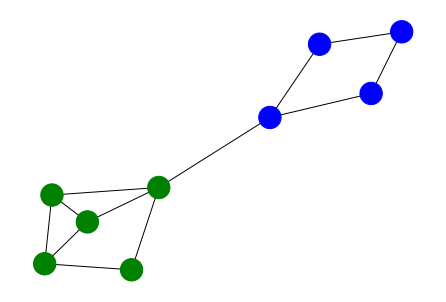

In [8]:
# Your code
show_graph(adj, main_list)

<div dir="rtl">
    برای داشتن تعداد بیشتری خوشه، می‌توان بردار ویژه‌های بیشتری در نظر گرفت.
    برای مثال، برای داشتن ۴ خوشه می‌توانید بردار ویژه‌ی متناظر با ۲ کوچک‌ترین مقدار ویژه‌های مثبت را در نظر بگیرید.
    حال به ازای هر راس، دو درایه در این دو بردار ویژه داریم.
    می‌توانید ۴ خوشه را به صورت زیر در نظر بگیرید:
    <ul>
        <li>$(+,+)$</li>
        <li>$(+,-)$</li>
        <li>$(-,+)$</li>
        <li>$(-,-)$</li>
    </ul>
    با انجام این خوشه‌بندی روی گراف اولیه، می‌توانید مشاهده کنید خوشه‌بندی مناسب نبوده و همان دو خوشه‌ی اولیه دقیق‌تر بودند.
</div>

In [9]:
# Your code
main_list = []
first_one = eigenVectors[len(eigenVectors) - 2]
second_one = eigenVectors[len(eigenVectors) - 3]
for i in range(len(first_one)):
    if first_one[i] < 0 and second_one[i] < 0:
        main_list.append(1)
    elif first_one[i] < 0 and second_one[i] >= 0:
        main_list.append(2)
    elif first_one[i] >= 0 and second_one[i] < 0:
        main_list.append(3)
    elif first_one[i] >= 0 and second_one[i] >= 0:
        main_list.append(4)
print(main_list)

[2, 1, 2, 2, 4, 3, 4, 4, 4]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

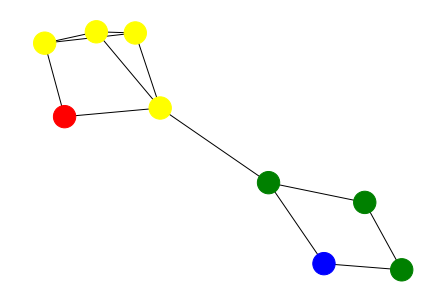

In [10]:
# Your code
show_graph(adj, main_list)

<div dir="rtl">
    <h2>
        گراف اصلی
    </h2>
</div>

<div dir="rtl">
    اگر چه در گراف تمرینی خوشه‌بندی با چشم هم قابل مشاهده بود، در گراف با رئوس بیشتر این کار به صورت چشمی ممکن نیست.
    در این قسمت، مراحل بالا را روی گراف اصلی اجرا کنید و خوشه‌بندی با ۲ و ۴ خوشه را بدست آورید.
</div>

In [11]:
adj_final = np.zeros((100, 100))
file1 = open('data.txt', 'r')
lines = file1.readlines()
print(len(lines))
for l in lines:
    i, j = l.split()
    if i != '#':
        adj_final[int(i) - 1, int(j) - 1] = 1
        adj_final[int(j) - 1, int(i) - 1] = 1
print(adj_final)

772
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [12]:
# Your code
Sum = np.sum(adj_final, axis=0)
Sum_list = list(Sum)
diag_list = []
counter = 0
for i in range(len(Sum_list)):
    diag_list.append([])
    for j in range(len(Sum_list)):
        if j == counter:
            diag_list[counter].append(Sum_list[counter])
        else:
            diag_list[counter].append(0)
    counter += 1
diag = np.array(diag_list)
Lapl = diag - adj_final
print(Lapl)

print("******************************************************")

eigenValues, eigenVectors = np.linalg.eig(Lapl)
eigenVectors[abs(eigenVectors) < 1e-12] = 0

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
print(eigenValues)
print("------")
print(eigenVectors)


eigenVectors = eigenVectors.T
main_list = []
for i in eigenVectors[len(eigenVectors) - 2]:
    if i < 0:
        main_list.append(1)
    else:
        main_list.append(2)

main_list2 = []
first_one = eigenVectors[len(eigenVectors) - 2]
second_one = eigenVectors[len(eigenVectors) - 3]
for i in range(len(first_one)):
    if first_one[i] < 0 and second_one[i] < 0:
        main_list2.append(1)
    elif first_one[i] < 0 and second_one[i] >= 0:
        main_list2.append(2)
    elif first_one[i] >= 0 and second_one[i] < 0:
        main_list2.append(3)
    else:
        main_list2.append(4)

[[ 9. -1.  0. ...  0.  0.  0.]
 [-1.  9.  0. ...  0.  0.  0.]
 [ 0.  0.  9. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 29.  0. -1.]
 [ 0.  0.  0. ...  0. 29.  0.]
 [ 0.  0.  0. ... -1.  0. 30.]]
******************************************************
[3.11935973e+01 3.02618467e+01 3.01182408e+01 2.92817266e+01
 2.91084084e+01 2.75074000e+01 2.71743540e+01 2.66155421e+01
 2.62876617e+01 2.61671538e+01 2.55910657e+01 2.47004348e+01
 2.43839356e+01 2.40131950e+01 2.37809486e+01 2.36829236e+01
 2.32535770e+01 2.30312815e+01 2.23994962e+01 2.14059221e+01
 2.11101186e+01 2.03287870e+01 2.01830814e+01 1.99769158e+01
 1.91707588e+01 1.89116896e+01 1.86850168e+01 1.86077875e+01
 1.81369484e+01 1.77288037e+01 1.73874727e+01 1.72821571e+01
 1.71618666e+01 1.70028324e+01 1.69106021e+01 1.67965996e+01
 1.65804639e+01 1.64820410e+01 1.62310944e+01 1.61165765e+01
 1.59246208e+01 1.57967517e+01 1.56496305e+01 1.54985231e+01
 1.54596099e+01 1.52650234e+01 1.50869676e+01 1.48427997e+01
 1.48084421e+01 1.466

<div dir="rtl">
    گراف‌هایی که با ۲ و ۴ خوشه، خوشه‌بندی کردید را توسط تابع show_graph نمایش دهید.
</div>

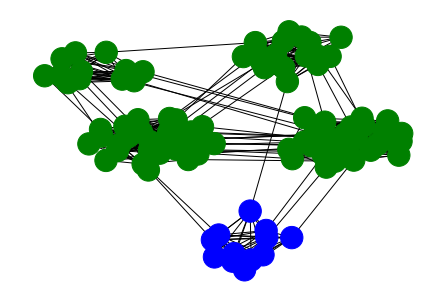

In [13]:
# Your code
show_graph(adj_final, main_list)

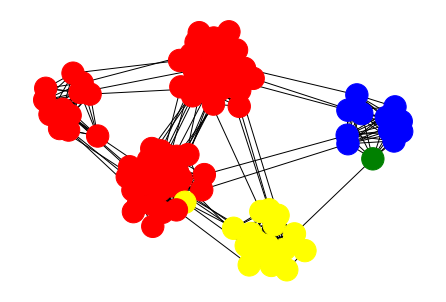

In [14]:
show_graph(adj_final, main_list2)